In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

from my_utils import *

from laplace2D import *

import copy

In [2]:
my_grid = grid(-1.5,1.5,.05,-1,1,.05)

c1 = conductor(-1,-0.7,-0.5,0.5,V=1)
c2 = conductor(0.7,1,-0.5,0.5,V=-1.)
d1 = dielectric(-0.5,0.5,-0.3,0.3,eps_r=3)
conductor_list = [c1,c2]
dielectric_list = [d1]

In [3]:
V = field(grid=my_grid)
fixed_mask, start_potential = conductors_to_mask(my_grid,conductor_list)
potential = copy.deepcopy(start_potential)
epsilon = gen_dielectric_field(my_grid,dielectric_list)

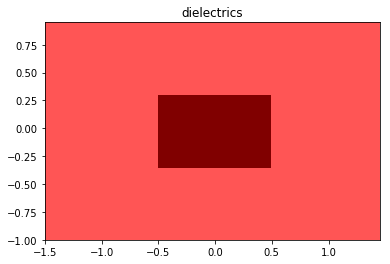

In [4]:

scale= np.max(epsilon.matrix)

plt.pcolormesh(my_grid.X,my_grid.Y,epsilon.matrix,cmap="seismic")
plt.clim(-scale,scale)
plt.title("dielectrics")
plt.show()

In [5]:
for i in range(10000):
    relax_2D_dielectric(potential,fixed_mask,epsilon)

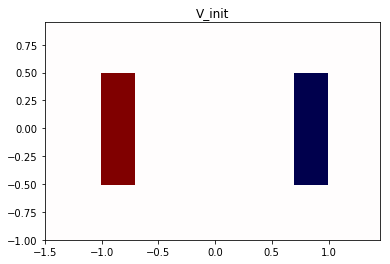

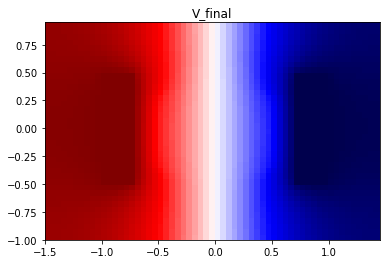

In [6]:
#small_figure()

scale= 1

plt.pcolormesh(my_grid.X,my_grid.Y,start_potential.matrix,cmap="seismic")
plt.clim(-scale,scale)
plt.title("V_init")
plt.show()

plt.pcolormesh(my_grid.X,my_grid.Y,potential.matrix,cmap="seismic")
plt.clim(-scale,scale)
plt.title("V_final")
plt.show()

In [7]:
E = E_from_V(potential)

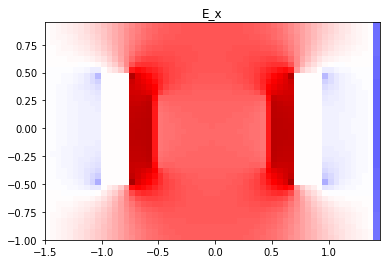

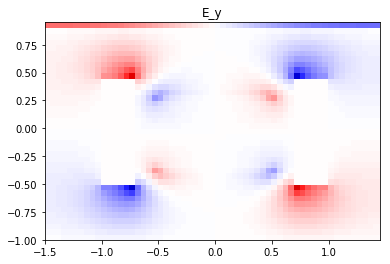

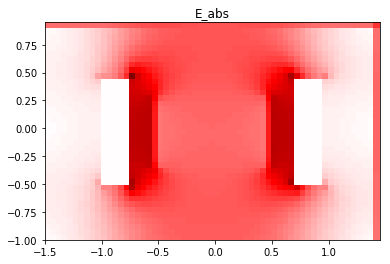

In [8]:
e_abs = E.abs_matrix()

scale = np.max(e_abs)


plt.pcolormesh(my_grid.X,my_grid.Y,E.matrix[:,:,0],cmap="seismic")
plt.clim(-scale,scale)
plt.title("E_x")
plt.show()

plt.pcolormesh(my_grid.X,my_grid.Y,E.matrix[:,:,1],cmap="seismic")
plt.clim(-scale,scale)
plt.title("E_y")
plt.show()

plt.pcolormesh(my_grid.X,my_grid.Y,e_abs, cmap='seismic')
plt.clim(-scale,scale)
plt.title("E_abs")
plt.show()

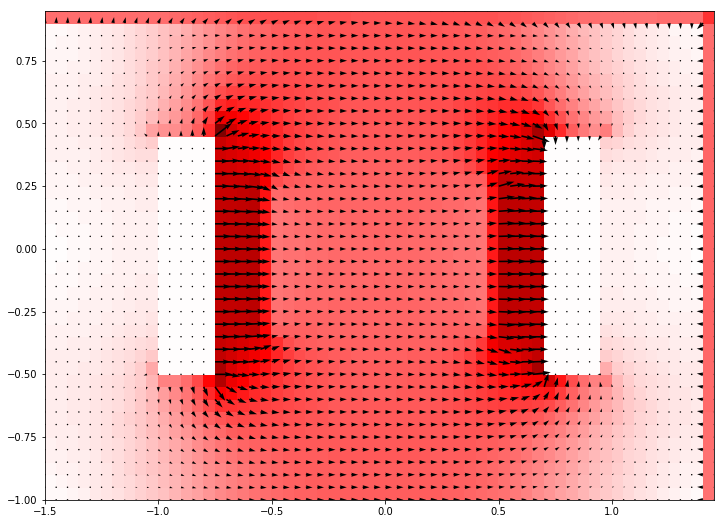

In [9]:
big_figure()

plt.pcolormesh(my_grid.X,my_grid.Y,e_abs,cmap="seismic")
plt.clim(-scale,scale)
plt.quiver(my_grid.X,my_grid.Y,E.matrix[:,:,0],E.matrix[:,:,1], scale=100)

#plt.xlim(-0.6,0.6)
#plt.ylim(-0.1,0.5)
plt.show()

In [10]:
small_figure()

D = D_from_V(potential,epsilon)

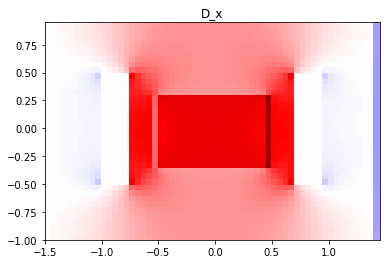

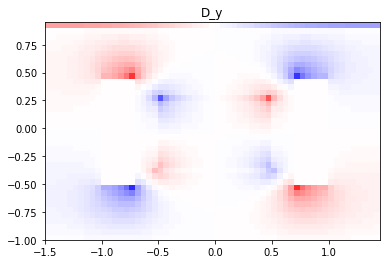

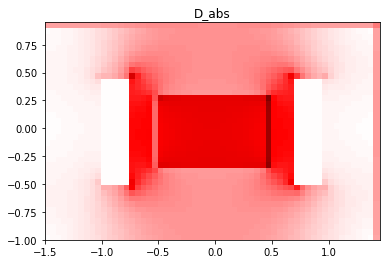

In [11]:
d_abs = D.abs_matrix()

scale = np.max(d_abs)


plt.pcolormesh(my_grid.X,my_grid.Y,D.matrix[:,:,0],cmap="seismic")
plt.clim(-scale,scale)
plt.title("D_x")
plt.show()

plt.pcolormesh(my_grid.X,my_grid.Y,D.matrix[:,:,1],cmap="seismic")
plt.clim(-scale,scale)
plt.title("D_y")
plt.show()

plt.pcolormesh(my_grid.X,my_grid.Y,d_abs, cmap='seismic')
plt.clim(-scale,scale)
plt.title("D_abs")
plt.show()

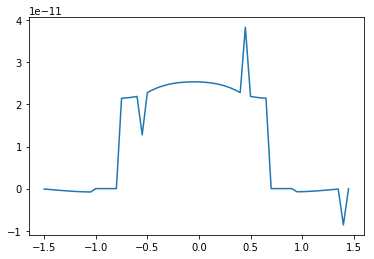

In [12]:
middle , dummy = my_grid.pos_to_index(0,0)

plt.plot(my_grid.x_edges,D.matrix[middle,:,0])

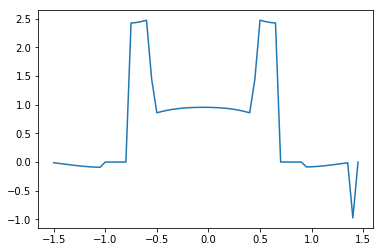

In [13]:
middle , dummy = my_grid.pos_to_index(0,0)

plt.plot(my_grid.x_edges,E.matrix[middle,:,0])

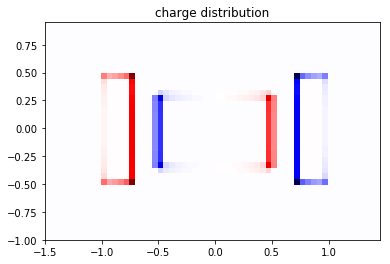

In [14]:
rho = rho_from_V(potential,epsilon)

scale = np.max(np.abs(rho.matrix))
scale = 8e-10

plt.pcolormesh(my_grid.X,my_grid.Y,rho.matrix,cmap="seismic")
plt.clim(-scale,scale)
plt.title("charge distribution")
plt.show()

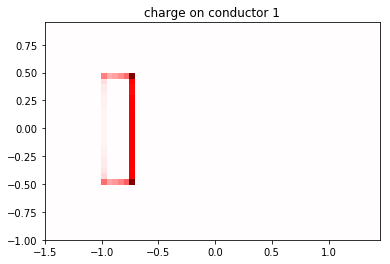

1.1439388182505374e-08

In [15]:
scale = 8e-10

c1_mask, dummy = conductors_to_mask(my_grid,[c1])

plt.pcolormesh(my_grid.X,my_grid.Y,rho.matrix * c1_mask.matrix,cmap="seismic")
plt.clim(-scale,scale)
plt.title("charge on conductor 1")
plt.show()

np.sum(rho.matrix * c1_mask.matrix)

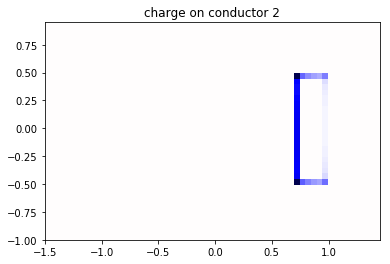

-1.1439388163808276e-08

In [16]:
scale = 8e-10

c2_mask, dummy = conductors_to_mask(my_grid,[c2])

plt.pcolormesh(my_grid.X,my_grid.Y,rho.matrix * c2_mask.matrix,cmap="seismic")
plt.clim(-scale,scale)
plt.title("charge on conductor 2")
plt.show()

np.sum(rho.matrix * c2_mask.matrix)